# 1. Bias Any Stretch of the Imagination
## Sampling context

> **Polulation**: It is the complete dataset.

In [1]:
import pandas as pd
spotify_population = pd.read_feather('spotify_2000_2020.feather')
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


###### Population parameter
**A calculation made on the population dataset.**

In [2]:
import numpy as np
np.mean(spotify_population['danceability'])

0.5912139139619694

###### Point estimate or sample statistic
**A sample statistic is a calculation made on the sample dataset.**

In [3]:
sample = spotify_population['danceability'].sample(5000)
np.mean(sample)

0.590767460000001

> The means are similar.
### Simple sampling with pandas


In [4]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(1000)

# Print the sample
spotify_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9821,0.35500,['Jhené Aiko'],0.439,237573.0,3.959550,0.505,1.0,3Px6rA0efiFjaIImH9pdaR,0.005490,1.0,0.1340,-9.572,0.0,The Pressure,51.0,2014-09-08,0.1290,84.736,0.420,2014.0
21073,0.00797,['Audioslave'],0.614,293960.0,4.899333,0.568,0.0,3YuaBvuZqcwN3CEAyyoaei,0.000000,7.0,0.0997,-5.477,0.0,Like a Stone,76.0,2002-11-17,0.0276,107.849,0.516,2002.0
5492,0.31100,"['Josh WaWa White', 'DAK']",0.861,289072.0,4.817867,0.238,1.0,6AAgV2gjVmiv9x45AAA8EP,0.000002,7.0,0.0257,-11.367,1.0,Movin' About My Ways (feat. Dak),52.0,2012-04-27,0.1470,90.009,0.792,2012.0
13821,0.01970,"['Victorious Cast', 'Victoria Justice']",0.593,194893.0,3.248217,0.814,0.0,0powdVQEIZSaSnNupt2yPE,0.000000,9.0,0.1800,-4.802,1.0,Faster than Boyz,45.0,2012-11-06,0.1660,146.919,0.480,2012.0
30746,0.20000,['Luke Bryan'],0.548,206213.0,3.436883,0.901,0.0,2gYiCTytrSRtuaHP1Nac6u,0.000000,0.0,0.1000,-2.637,0.0,Fast,60.0,2015-08-07,0.0453,145.953,0.557,2015.0


In [5]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140899896
3.8451639333333305


> Notice that the mean song duration in the sample is similar, but not identical to the mean song duration in the whole population.

### Simple sampling and calculating with NumPy


In [6]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353918
-6.923319999999999


> Again, notice that the calculated value (the mean) is close but not identical in each case.
## A little too convenient


In [7]:
coffee_ratings = pd.read_feather('coffee_ratings_full.feather')
coffee_ratings.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [8]:
coffee_ratings['total_cup_points'].mean()

82.15120328849018

In [9]:
coffee_ratings['total_cup_points'].head(10).mean()

89.1

> The sample is NOT representative

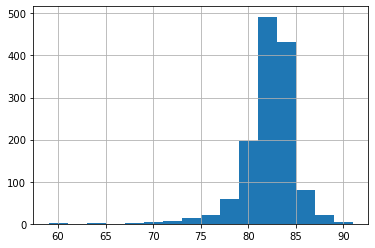

In [10]:
import matplotlib.pyplot as plt
import numpy as np
coffee_ratings['total_cup_points'].hist(bins=np.arange(59,93,2))
plt.show()

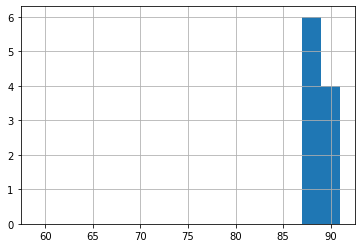

In [11]:
first_10 = coffee_ratings['total_cup_points'].head(10)
first_10.hist(bins=np.arange(59,93,2))
plt.show()

> The sample is not representative, all the sample values are on the right hand side of the plot.

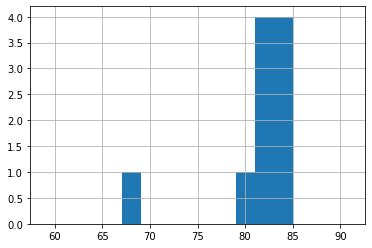

In [12]:
sample_10 = coffee_ratings['total_cup_points'].sample(10)
sample_10.hist(bins=np.arange(59,93,2))
plt.show()

> Notice how the shape of the distribution is more closely aligned when random sampling is used.

### Are the findings from this sample generalizable?


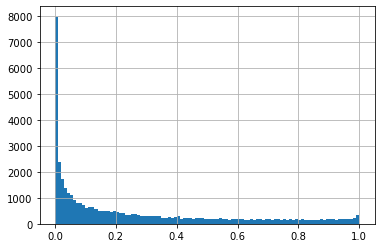

In [13]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

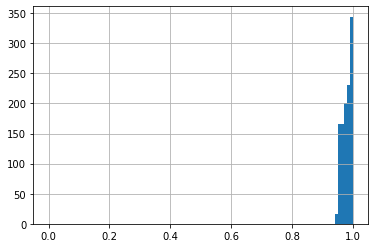

In [14]:
spotify_mysterious_sample = spotify_population[spotify_population['acousticness'].between(0.95, 1)]
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

> Are the acousticness values in the sample generalizable to the general population?

> **No. The acousticness samples are consistently higher than those in the general population.**

### Are these findings generalizable?


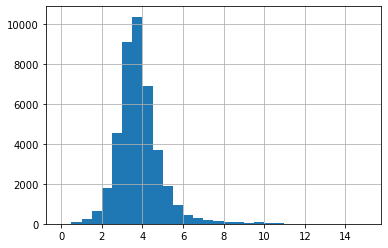

In [15]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0,15.5,0.5))
plt.show()

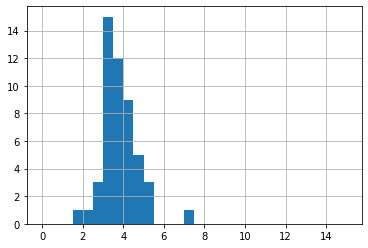

In [16]:
spotify_mysterious_sample2 = spotify_population.sample(50)
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

> Are the duration values in the sample generalizable to the general population?

> **Yes. The sample selected is likely a random sample of all songs in the population.**

## How does Sue do sampling?

###### Pseudo-random number generation is cheap ans fast
> Next "random" number calculated from previous "random" number.
> The first "random" number calculated as a seed.

##### Visualizing random numbers

In [17]:
randoms = np.random.beta(a=2,b=2,size=5000)
randoms

array([0.78840258, 0.7988662 , 0.28834158, ..., 0.44317628, 0.20305374,
       0.56589163])

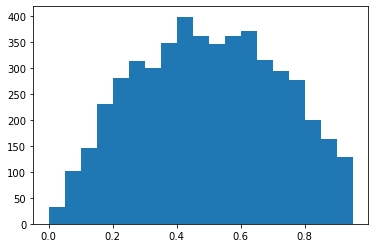

In [18]:
plt.hist(randoms, bins=np.arange(0,1,0.05))
plt.show()

###### Random numbers seeds

In [19]:
np.random.seed(20000229)
np.random.normal(loc=2, scale=1.5,size=2)

array([-0.59030264,  1.87821258])

In [20]:
np.random.normal(loc=2, scale=1.5,size=2)

array([2.52619561, 4.9684949 ])

In [21]:
np.random.seed(20000229)
np.random.normal(loc=2, scale=1.5,size=2)
np.random.normal(loc=2, scale=1.5,size=2)

array([2.52619561, 4.9684949 ])

###### Using a different seed

In [22]:
np.random.seed(20041004)
np.random.normal(loc=2, scale=1.5,size=2)

array([1.09364337, 4.55285159])

In [23]:
np.random.normal(loc=2, scale=1.5,size=2)

array([2.67038916, 2.36677492])

> The seed makes the code reproducible and give different numbers.

### Generating random numbers


In [24]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)
# Print normals
uniforms

array([1.31207896, 2.65406494, 0.16554078, ..., 0.32216778, 1.19004017,
       1.5796729 ])

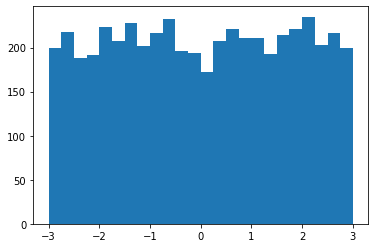

In [25]:
# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3,3.25,0.25))
plt.show()

In [26]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)
normals

array([6.09424718, 6.75024563, 1.47256354, ..., 7.71050109, 3.02441799,
       4.53098064])

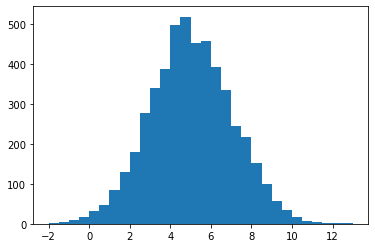

In [27]:
# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2,13.5,0.5))
plt.show()

> Notice how the histograms almost take the flat and bell curve shapes of the uniform and normal distributions, but there is a bit of random noise.

### Understanding random seeds


In [28]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
x, y

(array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]),
 array([ 1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ]))

> The values of x are different from those of y.

In [29]:
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
x, y

(array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]),
 array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]))

> x and y have identical values.

In [30]:
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
x, y

(array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]),
 array([-0.6681285 , -0.49820952,  0.61857582,  0.56869225,  1.35050948]))

> The values of x are different from those of y.



# 2. Don't get theory eyed
## Simple is as simple does
###### Simple random sampling with pandas

In [31]:
coffee_ratings.sample(n=5, random_state=19000113) # random_state is the seed of sample

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
437,83.25,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora bonanza - armenia quindioa,3-68-0205,None,1600-1800msnm,...,None,0.0,"June 13th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1800.0,1700.0
285,83.83,Arabica,ipanema coffees,Brazil,fazenda rio verde,None,ipanema coffees,002/4177/0121,ipanema coffees,1260,...,Green,0.0,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1260.0,1260.0,1260.0
784,82.08,Arabica,cafe politico,Colombia,None,None,None,3-59-1656,cafe politico,None,...,Green,0.0,"September 12th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
648,82.58,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Green,0.0,"February 27th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0


> A seed makes reproducible results.

###### Systematic sampling



In [32]:
sample_size = 5
pop_size = len(coffee_ratings)
pop_size

1338

In [33]:
interval = pop_size // sample_size
interval

267

In [34]:
coffee_ratings.iloc[::interval]

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


> Double-colon interval tells pandas to select every 267 row from 0 to the end of the DataFrame.

**Downfalls of systematic sampling**

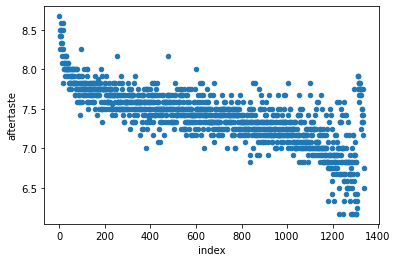

In [35]:
coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x='index', y='aftertaste', kind='scatter')
plt.show()

> Plotting aftertaste against index shows a pattern. Earlier rows generally have higher aftertaste scores than later rows.

> This introduces bias into the statistics that we calculate.

> **Systematic sampling in only safe if we do NOT see a pattern in the scatter plot.**

###### Making systematic sampling safe

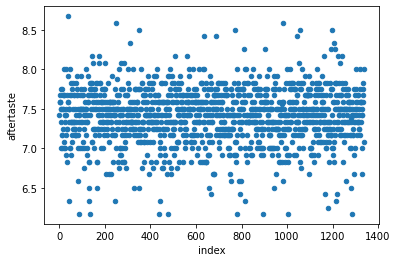

In [36]:
shuffled = coffee_ratings.sample(frac=1) # Setting frac = 1 randomly samples the whole dataset.
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x='index', y='aftertaste', kind='scatter')
plt.show()

> There is not a pattern between aftertaste and index.

> **Shuffling rows + systematic sampling is the same as simple random sampling.**
### Simple random sampling


In [37]:
attrition_pop = pd.read_feather('attrition.feather')
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [38]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(70, random_state=18900217)

# Print the sample
attrition_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


### Systematic sampling


In [39]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size
interval

21

In [40]:
# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
attrition_sys_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,48,0.0,Travel_Rarely,715,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,25,3,Best,1,0,0,0
1386,48,0.0,Travel_Rarely,1355,Research_Development,4,Master,Life_Sciences,High,Male,...,Excellent,Medium,0,27,3,Better,15,11,4,8
1407,50,0.0,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8
1428,50,0.0,Non-Travel,881,Research_Development,2,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,31,3,Better,31,6,14,7


> Systematic sampling avoids randomness by picking rows at regular intervals.

### Is systematic sampling OK?


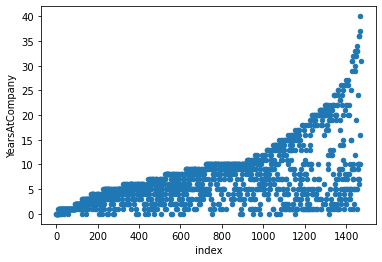

In [41]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

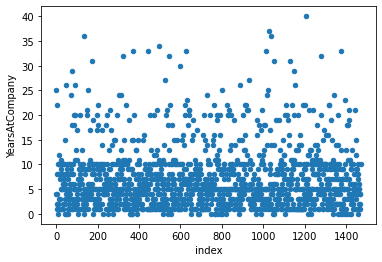

In [42]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

> **Systematic sampling has problems when the data are sorted or contain a pattern. Shuffling the rows makes it equivalent to simple random sampling.**

### Can't get no stratisfaction


In [43]:
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64

**Filtering for 6 countries**

In [44]:
top_countries = ['Mexico','Colombia','Guatemala','Brazil','Taiwan','United States (Hawaii)']
top_counted_subset = coffee_ratings['country_of_origin'].isin(top_countries)
coffee_ratings_top = coffee_ratings[top_counted_subset]
coffee_ratings_top.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
5,88.83,Arabica,ji-ae ahn,Brazil,None,None,None,None,None,None,...,Bluish-Green,1.0,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
13,87.92,Arabica,grounds for health admin,United States (Hawaii),arianna farms,None,None,None,None,2000 ft,...,None,2.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.6,609.6,609.6
22,87.17,Arabica,roberto licona franco,Mexico,la herradura,None,la herradura,0,None,1320,...,Green,0.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.0,1320.0,1320.0
25,86.92,Arabica,nucoffee,Brazil,fazenda kaquend,None,None,002/1251/0073,nucoffee,1250m,...,Green,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1250.0,1250.0,1250.0


**Counts of a simple random sample**

In [45]:
coffee_ratings_sample = coffee_ratings_top.sample(frac=0.1, random_state=2021)
coffee_ratings_sample['country_of_origin'].value_counts(normalize=True)

Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: country_of_origin, dtype: float64

> **Compare with coffee_ratings_top sample** 

In [46]:
coffee_ratings_top['country_of_origin'].value_counts(normalize=True).head(6)

Mexico                    0.268182
Colombia                  0.207955
Guatemala                 0.205682
Brazil                    0.150000
Taiwan                    0.085227
United States (Hawaii)    0.082955
Name: country_of_origin, dtype: float64

**Proportional stratified sampling.**

In [47]:
coffee_ratings_strat = coffee_ratings_top.groupby('country_of_origin').sample(frac=0.1, random_state=2021)
coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)

Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

**Equal counts stratified sampling.**

In [48]:
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin").sample(n=15, random_state=2021)
coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: country_of_origin, dtype: float64

> Here the resulting sample has equal proportion 16.67% of each country.

**Weighted random sampling.**

In [49]:
coffee_ratings_weight = coffee_ratings_top.copy()
condition = coffee_ratings_weight['country_of_origin'] == 'Taiwan'
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)
coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights='weight')
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

Mexico                    0.306818
Taiwan                    0.193182
Brazil                    0.147727
Colombia                  0.136364
Guatemala                 0.136364
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

> **This means when each row is randomly sampled, Taiwanese coffees have 2 times the change of being picked compared to other coffees.**

**This sort of weighted sampling is common in political polling, where we need to correct for "under" o "over" representation of demographic groups.**

#### Stratified sampling is useful if you care about subgroups. Otherwise, simple random sampling is more appropriate.
### Proportional stratified sampling


In [50]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
education_counts_pop

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64

In [51]:
# Use proportional stratified sampling on attrition_pop to sample 40% of each Education group, setting the seed to 2022.

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education').sample(frac=0.4, random_state=2022)
attrition_strat.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4


In [52]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
education_counts_strat

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64

> By grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.

### Equal counts stratified sampling


In [53]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      
attrition_eq.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4


In [54]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
education_counts_eq

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64

> If you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique.
### Weighted sampling


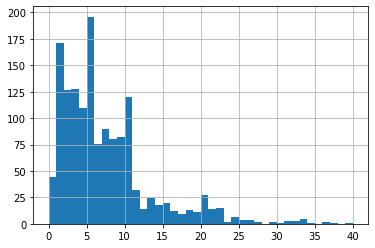

In [55]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()

In [56]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop['YearsAtCompany'].sample(400)

attrition_weight

168      3
412      4
1144     2
1180    13
743     10
        ..
693      4
40       1
767     10
183      3
411      6
Name: YearsAtCompany, Length: 400, dtype: int32

In [57]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")
attrition_weight.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1469,58,1.0,Travel_Rarely,286,Research_Development,2,Master,Life_Sciences,Very_High,Male,...,Excellent,Very_High,0,40,2,Better,31,15,13,8
410,28,0.0,Travel_Rarely,580,Research_Development,27,Bachelor,Medical,Medium,Female,...,Outstanding,Medium,1,6,5,Good,5,3,0,0
1271,39,0.0,Travel_Rarely,117,Research_Development,10,Below_College,Medical,High,Male,...,Excellent,Very_High,0,21,3,Better,21,9,11,10
242,25,0.0,Travel_Rarely,685,Research_Development,1,Bachelor,Life_Sciences,Low,Female,...,Excellent,Very_High,2,5,3,Better,4,2,1,2
233,34,0.0,Travel_Rarely,1153,Research_Development,1,College,Medical,Low,Male,...,Excellent,High,0,5,2,Better,5,2,1,3


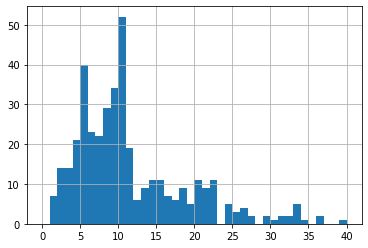

In [58]:
# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

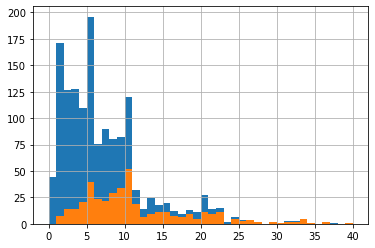

In [59]:
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

> The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.
## What a cluster...

#### Stratified sampling vs. Cluster sampling

**Stratified:**
* Split the population into subgroups.
* Use simple random sampling on every subgroup.

**Cluster:**
* Use simple random sampling to pick some subgroups.
* Use simple random sampling on only those subgroups.

In [60]:
varieties_pop = list(coffee_ratings['variety'].unique())
varieties_pop

[None,
 'Other',
 'Bourbon',
 'Catimor',
 'Ethiopian Yirgacheffe',
 'Caturra',
 'SL14',
 'Sumatra',
 'SL34',
 'Hawaiian Kona',
 'Yellow Bourbon',
 'SL28',
 'Gesha',
 'Catuai',
 'Pacamara',
 'Typica',
 'Sumatra Lintong',
 'Mundo Novo',
 'Java',
 'Peaberry',
 'Pacas',
 'Mandheling',
 'Ruiru 11',
 'Arusha',
 'Ethiopian Heirlooms',
 'Moka Peaberry',
 'Sulawesi',
 'Blue Mountain',
 'Marigojipe',
 'Pache Comun']

##### Stage 1: sampling subgroups

In [61]:
import random
varieties_sample = random.sample(varieties_pop, k=3)
varieties_sample

['Yellow Bourbon', 'SL14', 'Caturra']

##### Stage 2: sampling each group


In [62]:
variety_condition = coffee_ratings['variety'].isin(varieties_sample)
coffee_ratings_cluster = coffee_ratings[variety_condition]
coffee_ratings_cluster = coffee_ratings_cluster.copy()
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category').cat.remove_unused_categories()

coffee_ratings_cluster['variety'].value_counts()

Caturra           255
Yellow Bourbon     35
SL14               17
Name: variety, dtype: int64

In [63]:
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category').cat.remove_unused_categories()

coffee_ratings_cluster['variety'].value_counts()

Caturra           255
Yellow Bourbon     35
SL14               17
Name: variety, dtype: int64

In [64]:
coffee_ratings_cluster.groupby('variety').sample(n=1, random_state=2021)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
97,85.00,Arabica,racafe & cia s.c.a,Colombia,None,3-37-1829,bachue,3-37-1829,racafe & cia s.c.a,None,...,Green,3.0,"February 15th, 2018",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
380,83.42,Arabica,bugisu cooperative union,Uganda,bulago & buginyanya,5055,bcu,7697,bugisu cooperative union,1800,...,Green,1.0,"July 21st, 2017",Uganda Coffee Development Authority,188fe373b511e21f614564bf86aa4774270d8e04,b7614767a5343729bbde3a2777c60ce836aed928,m,1800.0,1800.0,1800.0
683,82.42,Arabica,ipanema coffees,Brazil,rio verde,None,ipanema comercial e exportadora sa,002/4177/0150,ipanema coffees,1,...,Green,0.0,"October 7th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,1.0,1.0,1.0


> 3 rows 1 of each variety.

**Multistage sampling**
* Cluster sampling is a type of multistage sampling.
* Can have more than 2 stages.
* Cases: Countrywide surveys may sample states, counties, cities, and neighborhoods.


> **The main benefit of cluster sampling over stratified sampling is that you can save time and money by not including every subgroup in your sample.**

### Cluster sampling


In [65]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())
job_roles_pop

['Research_Scientist',
 'Sales_Representative',
 'Laboratory_Technician',
 'Human_Resources',
 'Sales_Executive',
 'Manufacturing_Director',
 'Healthcare_Representative',
 'Research_Director',
 'Manager']

In [66]:
# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)
job_roles_samp

['Healthcare_Representative',
 'Research_Scientist',
 'Research_Director',
 'Manager']

In [67]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]
attrition_filtered.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
5,27,0.0,Non-Travel,443,Research_Development,3,Bachelor,Medical,Very_High,Male,...,Excellent,High,3,0,6,Good,0,0,0,0
6,18,0.0,Non-Travel,287,Research_Development,5,College,Life_Sciences,Medium,Male,...,Excellent,Very_High,0,0,2,Better,0,0,0,0
10,18,0.0,Non-Travel,1431,Research_Development,14,Bachelor,Medical,Medium,Female,...,Excellent,High,0,0,4,Bad,0,0,0,0
17,31,0.0,Travel_Rarely,1082,Research_Development,1,Master,Medical,High,Male,...,Excellent,Medium,0,1,4,Better,1,1,1,0


In [68]:
attrition_filtered = attrition_filtered.copy()
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state=2022)

# Print the sample
attrition_clust

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
812,31,0.0,Travel_Rarely,616,Research_Development,12,Bachelor,Medical,Very_High,Female,...,Excellent,High,2,10,2,Bad,9,7,8,5
1190,38,0.0,Travel_Rarely,1495,Research_Development,10,Bachelor,Medical,High,Female,...,Excellent,High,1,18,4,Better,1,0,0,0
378,33,0.0,Travel_Rarely,1069,Research_Development,1,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Low,0,6,3,Better,5,0,1,4
920,35,0.0,Travel_Frequently,1199,Research_Development,18,Master,Life_Sciences,High,Male,...,Excellent,Very_High,2,10,2,Best,10,2,0,2
917,33,0.0,Travel_Rarely,501,Research_Development,15,College,Medical,Medium,Female,...,Excellent,Low,1,10,6,Better,9,7,8,1
1058,34,0.0,Travel_Rarely,404,Research_Development,2,Master,Technical_Degree,High,Female,...,Excellent,Very_High,0,14,2,Best,14,11,4,11
1264,46,0.0,Travel_Frequently,638,Research_Development,1,Bachelor,Medical,High,Male,...,Excellent,High,1,21,5,Good,10,9,9,5
1340,44,0.0,Travel_Rarely,477,Research_Development,7,Master,Medical,Low,Female,...,Excellent,Very_High,1,24,4,Better,22,6,5,17
655,34,0.0,Travel_Rarely,1442,Research_Development,9,Bachelor,Medical,Very_High,Female,...,Excellent,Medium,0,9,3,Best,8,7,7,7
896,42,0.0,Travel_Rarely,1128,Research_Development,13,Bachelor,Medical,Medium,Male,...,Excellent,High,2,10,2,Good,0,0,0,0


> The two-stage sampling technique gives you control over sampling both between subgroups and within subgroups.

## Straight to the point (estimate)
### 3 kinds of sampling
##### Simple random sampling

In [69]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

##### Stratified sampling

In [70]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=0.25, random_state=2022)

##### Cluster sampling

In [71]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())
satisfaction_unique

['Very_High', 'High', 'Low', 'Medium']

In [72]:
# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)
satisfaction_samp

['High', 'Very_High']

In [73]:
# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep = attrition_clust_prep.copy()
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()
attrition_clust_prep['RelationshipSatisfaction'].unique()

['Very_High', 'High']
Categories (2, object): ['High' < 'Very_High']

In [74]:
attrition_clust_prep.shape

(891, 31)

In [75]:
len(attrition_pop) // 4

367

In [76]:
# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n=len(attrition_pop) // 4,random_state=2022, replace=True)
attrition_clust

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1231,37,0.0,Travel_Rarely,1239,Human_Resources,8,College,Other,High,Male,...,Excellent,High,0,19,4,Good,10,0,4,7
715,54,0.0,Travel_Rarely,155,Research_Development,9,College,Life_Sciences,Low,Female,...,Excellent,High,2,9,6,Good,4,3,2,3
525,34,1.0,Travel_Rarely,699,Research_Development,6,Below_College,Medical,Medium,Male,...,Excellent,High,0,8,2,Better,4,2,1,3
351,35,0.0,Travel_Rarely,144,Research_Development,22,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,6,2,Better,5,4,4,3
540,37,0.0,Travel_Rarely,1192,Research_Development,5,College,Medical,Very_High,Male,...,Excellent,High,2,8,2,Good,6,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,39,0.0,Non-Travel,792,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,Very_High,1,9,2,Better,9,8,5,8
1302,40,0.0,Travel_Rarely,1416,Research_Development,2,College,Medical,Low,Male,...,Excellent,Very_High,1,22,5,Better,21,7,3,9
452,43,0.0,Non-Travel,1344,Research_Development,7,Bachelor,Medical,Very_High,Male,...,Excellent,Very_High,3,7,3,Best,5,4,2,2
855,45,0.0,Travel_Rarely,1448,Research_Development,29,Bachelor,Technical_Degree,Medium,Male,...,Excellent,Very_High,2,10,4,Best,3,1,1,2


### Comparing point estimates


In [77]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_pop

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64

In [78]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_srs

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64

In [79]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_strat

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64

In [80]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_clust

RelationshipSatisfaction
High         0.158038
Very_High    0.147139
Name: Attrition, dtype: float64

> The numbers are all fairly similar, with the notable exception that cluster sampling only gives results for the clusters included in the sample.

# 3. The n's justify the means
## An ample sample



In [81]:
coffee_ratings['total_cup_points'].mean()

82.15120328849018

In [82]:
coffee_ratings.sample(n=10)['total_cup_points'].mean()

82.74199999999999

In [83]:
coffee_ratings.sample(n=100)['total_cup_points'].mean()

81.6226

In [84]:
coffee_ratings.sample(n=1000)['total_cup_points'].mean()

82.11410999999995

> In general, larger sample sizes will give us more accurate results.
##### Relative error

In [85]:
pop_mean = coffee_ratings['total_cup_points'].mean()
sample_mean = coffee_ratings.sample(n=1000)['total_cup_points'].mean()

relative_error = 100 * abs(pop_mean - sample_mean) / pop_mean
relative_error

0.028979139144391562

### Calculating relative errors



In [86]:
mean_attrition_pop = attrition_pop['Attrition'].mean()

In [87]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop

# Print rel_error_pct50
rel_error_pct50

62.78481012658227

In [88]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop

# Print rel_error_pct100
rel_error_pct100

6.962025316455695

> As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

> As you increase the sample size, the relative error decreases quickly at first, then more slowly as it drops to zero.

## Baby back dist-rib-ution
##### Same code, 1000 times


In [89]:
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(coffee_ratings.sample(30)['total_cup_points'].mean())
    
mean_cup_points_1000[:10]

[81.71633333333334,
 81.89533333333335,
 82.08666666666666,
 82.58900000000001,
 82.48400000000001,
 82.24500000000002,
 82.01866666666666,
 81.641,
 82.38866666666667,
 82.94333333333334]

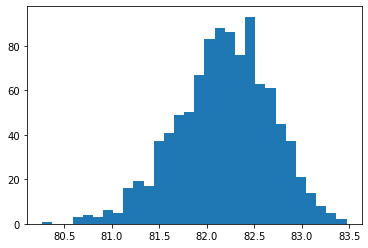

In [90]:
plt.hist(mean_cup_points_1000, bins=30)
plt.show()

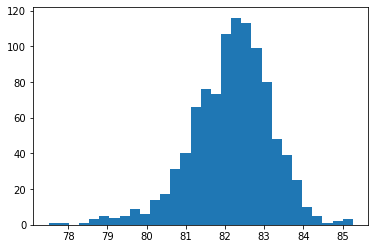

In [91]:
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(coffee_ratings.sample(6)['total_cup_points'].mean())
    
plt.hist(mean_cup_points_1000, bins=30)
plt.show()

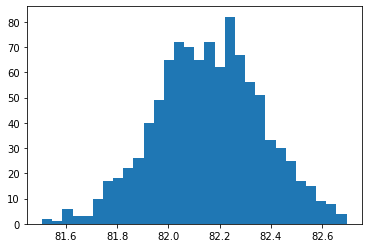

In [92]:
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(coffee_ratings.sample(150)['total_cup_points'].mean())
    
plt.hist(mean_cup_points_1000, bins=30)
plt.show()

### Replicating samples


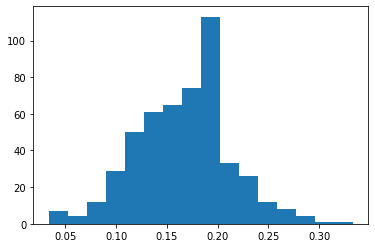

In [93]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

> By generating the sample statistic many times with different samples, you can quantify the amount of variation in those statistics.

> As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

## Be our guess, put our samples to the test

#### Simulating the mean of 4 dice rolls


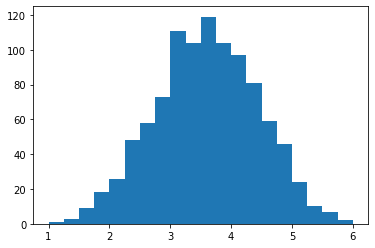

In [94]:
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(np.random.choice(list(range(1,7)), size=4, replace=True).mean())
plt.hist(sample_means_1000, bins=20)
plt.show()

### Exact sampling distribution


In [95]:
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })
dice.head()

,die1,die2,die3,die4,die5
0,1,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,1,4
4,1,1,1,1,5


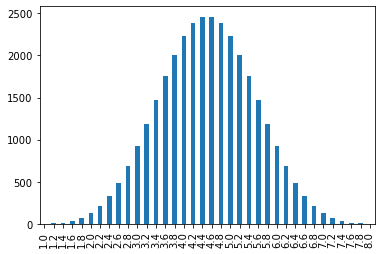

In [96]:
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

### Approximate sampling distribution


In [97]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,9)), size=5, replace=True)

# Print the mean of five_rolls
five_rolls.mean()

4.4

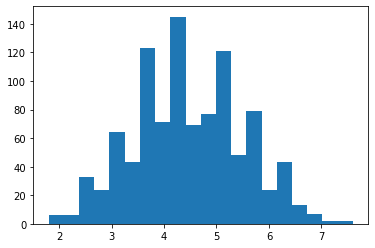

In [98]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

> Once your dataset gets sufficiently big, exact sampling distributions cannot be calculated, so an approximate sampling distribution must be used. Notice that the histogram is close to but not exactly the same as the shape of the bar graph from the previous exercise.

> The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

## Err on the side of Gaussian

##### Central limit theorem 

> **Averages of independent samples have approximately normal distributions.**


##### Standard error

> Standard deviation of the sampling distribution.

> Important tool in understanding sampling variability.

> The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.

> The amount of variation in the sampling distribution is related to the amount of variation in the population and the sample size.


# 4. Pull Your Data Up By Its Bootstraps
## This bears a striking resample-lance



In [99]:
coffee_focus = coffee_ratings[['variety', 'country_of_origin', 'flavor']]
coffee_focus = coffee_focus.reset_index()
coffee_focus.head()

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50


In [100]:
coffee_resample = coffee_focus.sample(frac=1, replace=True)
coffee_resample.shape

(1338, 4)

In [101]:
coffee_resample['index'].value_counts()

92      5
1187    4
131     4
493     4
460     4
       ..
721     1
983     1
54      1
446     1
1064    1
Name: index, Length: 875, dtype: int64

In [102]:
num_unique_coffees = len(coffee_resample.drop_duplicates(subset='index'))
num_unique_coffees

875

In [103]:
len(coffee_ratings) - num_unique_coffees

463

### Bootstrapping

The opposite of sampling from a population

**Sampling: going from a population to a smaller sample.**

**Bootstrapping: Building up a theoretical population from a sample.**

* Use case: Develop understanding of sampling variability using a single sample.

#### Bootstrapping process
1. Make a resample of the same size as the original sample.
2. Calculate the statistic of interest for this bootstrap sample.
3. Repeat steps 1 and 2 many times.

The resulting statistics are boostrap statistics, and they form a boostrap distribution.

(array([  8.,  46., 140., 261., 271., 187.,  74.,  10.,   1.,   2.]),
 array([7.48750374, 7.49421824, 7.50093274, 7.50764723, 7.51436173,
        7.52107623, 7.52779073, 7.53450523, 7.54121973, 7.54793423,
        7.55464873]),
 <BarContainer object of 10 artists>)

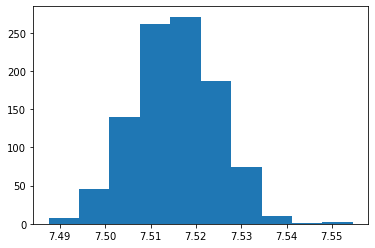

In [104]:
mean_flavors_1000 = []
for i in range(1000):
    mean_flavors_1000.append(np.mean(coffee_resample.sample(frac=1, replace=True)['flavor']))
plt.hist(mean_flavors_1000)

> The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.

> The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.

### Generating a bootstrap distribution


In [105]:
spotify_sample = spotify_population.sample(frac=1)

# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate mean danceability of resample
mean_danceability_1 = spotify_1_resample['danceability'].mean()

# Print the result
mean_danceability_1

0.5912804397925854

In [106]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
    mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
    )
# Print the result
mean_danceability_1000[:10]

[0.5911256313616277,
 0.5913613981179217,
 0.5906513203380106,
 0.5908611148453989,
 0.5924845088342632,
 0.5899941304974055,
 0.5903286921451796,
 0.5905277270981311,
 0.5909466295371599,
 0.5910542010754729]

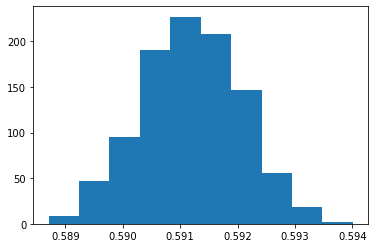

In [107]:
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

> From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is.

## A breath of fresh error



In [108]:
coffee_sample = coffee_ratings.sample(n=5000, replace=True)

In [109]:
mean_flavors_5000 = []
for i in range(5000):
    mean_flavors_5000.append(np.mean(coffee_sample.sample(frac=1, replace=True)['flavor']))
bootstrap_disn = mean_flavors_5000

In [110]:
coffee_sample['flavor'].mean()

7.5232700000000285

In [111]:
np.mean(bootstrap_disn)

7.523156094800026

In [112]:
coffee_ratings['flavor'].mean()

7.526046337817636

> **Bootstrap distribution mean:**
* Usually close to the sample mean
* May not be a good estimate of the population mean

**Bootstrapping cannot correct biases from sampling.**

In [113]:
coffee_sample['flavor'].std()

0.3393889863811399

In [114]:
standard_error = np.std(bootstrap_disn, ddof=1)
standard_error

0.0048014925669817915

> **Standard error is the standard deviation of the statistic of interest.**

In [115]:
standard_error * np.sqrt(5000)

0.3395167953929628

> **Standard error times square root of sample size estimates the population standard deviation.**

Should the mean and the standard deviation of the bootstrap distribution both be used to estimate the corresponding values of the population?

No, the mean of the bootstrap distribution will always be near the sample mean, which may not necessarily be very close to the population mean.

### Sampling distribution vs. bootstrap distribution


In [117]:
spotify_sample = spotify_population.sample(500)

sampling_distribution = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    sampling_distribution.append(
    # Sample 500 rows and calculate the mean popularity 
        spotify_population.sample(n=500)['popularity'].mean())

# Print the sampling distribution results
print(sampling_distribution[:10])

[55.888, 54.682, 54.574, 55.142, 54.358, 54.83, 54.604, 54.832, 54.89, 54.578]


In [118]:
bootstrap_distribution = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    bootstrap_distribution.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample.sample(frac=1, replace=True)['popularity'])
    )

# Print the bootstrap distribution results
print(bootstrap_distribution[:10])

[54.974, 54.908, 54.642, 54.466, 53.588, 53.49, 54.524, 54.426, 54.418, 55.034]


### Compare sampling and bootstrap means


In [119]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.422, 54.824144999999994, 54.395976]


> The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

### Compare sampling and bootstrap standard deviations


In [121]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std(ddof=1)

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof=1) * np.sqrt(500)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(500)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257204, 11.118955812337479, 10.854153528115674, 11.09797847696316]


> The calculation from the bootstrap distribution is the best estimate of the population standard deviation.

## Venus infers
###### Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range.

In [122]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(53.413850000000004, 55.32405)


In [124]:
from scipy.stats import norm
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(53.4232131710108, 55.368738828989194)


> The standard error method for calculating the confidence interval assumes that the bootstrap distribution is normal. This assumption should hold if the sample size and number of replicates are sufficiently large.